In [395]:
%run documentacao/2_funcoes.ipynb

In [396]:
df_covid = pd.read_csv('documentacao/dataset/Planilha COVID19 - Aparecida 2021_02112021.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (2,10,15,48,49,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Colunas comorbidade e risco: 

'Tem comorbidades?', 'Doença Resp. Crônica ', 'Doenças Renais Crônica em estágio Avançado ', 'Gestante', 'Portador de doenças cromossômaticas', 'Doenças Cardíacas Crônicas', 'Imunossupressão', 'Diabetes', 'Outros?'

Exceto a colunas 'Outros?', não há valores nulos!


In [397]:
comorbidade = ['Tem comorbidades?', 'Doença Resp. Crônica ', 'Doenças Renais Crônica em estágio Avançado ', 'Gestante', 'Portador de doenças cromossômaticas', 'Doenças Cardíacas Crônicas', 'Imunossupressão', 'Diabetes', 'Outros?']
df_covid[comorbidade].head()

,Tem comorbidades?,Doença Resp. Crônica,Doenças Renais Crônica em estágio Avançado,Gestante,Portador de doenças cromossômaticas,Doenças Cardíacas Crônicas,Imunossupressão,Diabetes,Outros?
0,Sim,Não,Não,Não,Não,Sim,Não,Não,NaN
1,Não,Não,Não,Não,Não,Não,Não,Não,NaN
2,Não,Não,Não,Não,Não,Não,Não,Não,NaN
3,Não,Não,Não,Não,Não,Não,Não,Não,NaN
4,Não,Não,Não,Não,Não,Não,Não,Não,NaN


In [421]:
df_covid['Evolução'].value_counts()

Cura/Recuperado           89747
Óbito por COVID-19         1715
Internado - Enfermaria      170
Isolamento Domiciliar       120
Internado - UTI              82
Name: Evolução, dtype: int64

In [398]:
df_covid['Tem comorbidades?'].unique()

array(['Sim', 'Não'], dtype=object)

Separar entre quem tem comorbidades e quem não tem

In [399]:
condicao = df_covid['Tem comorbidades?'] == 'Sim' 
df_comorbidade = df_covid[condicao]
print("Quantidade de pessoas com comorbidades: ", df_comorbidade.shape[0])

Quantidade de pessoas com comorbidades:  11449


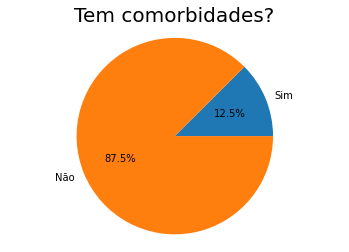

In [400]:
grafico_pizza(df_covid, 'Tem comorbidades?')

In [401]:
# ~ para negar a condição, que é sobre ter comorbidade, o contrário é não ter
df_saudavel = df_covid[~condicao]

In [402]:
df_comorbidade.head()

,Unnamed: 0,Número do Registro,Notificações ESUS - SIVEP,Sexo,Unidade Notificadora,Data de Nascimento,IdadeM,Outra Faixa etária,Raça/Cor,Bairro,...,Data do Diagnóstico,Data de Lançamento,Data da cura ou óbito,"Ja vacinou? Se sim, Qual Vacina?",Data 1° Dose,Data 2° Dose,"Fez sequenciamento? Se Sim, qual variante?",Tipo de Teste / Método,Laboratório,Observação
0,0,0,522001355107.0,Masculino,Hosp. Anis Rassi,1951-03-06,70,70 a 79 anos,Branca,Cidade Vera Cruz - Jardins Mônaco,...,2020-03-18,2020-03-18,2020-03-29 00:00:00,NaN,NaN,NaN,NaN,RT-PCR,Anis Rassi,Empresário. Relata viagem para Itália.
5,5,5,315934399039.0,Masculino,Cais Nova Era,1998-03-10,23,20 a 29 anos,Parda,Jardim Luz,...,2020-04-11,2020-04-11,2020-04-23 00:00:00,NaN,NaN,NaN,NaN,RT-PCR,LACEN GO,"Hosp.IRG, e Hosp. Goiânia Leste"
6,6,6,522000263368.0,Masculino,Unimed GO,1978-06-07,43,40 a 49 anos,Ignorado,Cidade Vera Cruz,...,2020-04-13,2020-04-13,2020-04-20 00:00:00,NaN,NaN,NaN,NaN,RT-PCR,Unimed GO,Analista de Sistema
7,7,7,315871545593.0,Feminino,Hosp. Anis Rassi,1963-07-16,58,50 a 59 anos,Branca,Vila Cruzeiro Do Sul,...,2020-04-13,2020-04-13,2020-04-19 00:00:00,NaN,NaN,NaN,NaN,RT-PCR,Anis Rassi,Empresária
8,8,8,522000272695.0,Feminino,Unimed GO,1978-08-22,43,40 a 49 anos,Branca,Jardim Luz,...,2020-04-14,2020-04-14,2020-04-27 00:00:00,NaN,NaN,NaN,NaN,RT-PCR,Unimed GO,Trabalha na Unimed


In [403]:
colunas = comorbidade
colunas.remove('Tem comorbidades?')
colunas.remove('Outros?')

In [404]:
df_comorbidade[df_comorbidade['Gestante'] == 'Sim'].shape[0]/df_comorbidade.shape[0] 

0.03519958074941043

In [405]:
df_comorbidade[df_comorbidade['Gestante'] == 'Sim'].shape[0]

403

Muita quantidade de zero, então podemos contar os zeros e retirá-los

<AxesSubplot:>

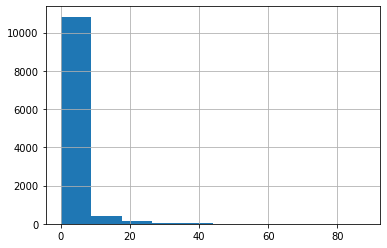

In [406]:
df_comorbidade['Qtd dias UTI'].hist()

<AxesSubplot:>

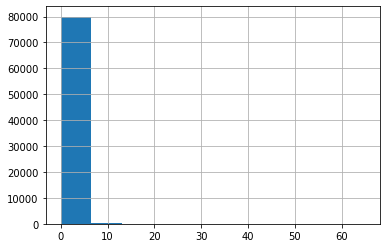

In [407]:
df_saudavel['Qtd dias UTI'].hist()

In [408]:
df_comorbidade['Qtd dias UTI'] > 0

0         True
5         True
6        False
7         True
8        False
         ...  
91739    False
91750    False
91770    False
91801    False
91830    False
Name: Qtd dias UTI, Length: 11449, dtype: bool

Dias na UTI maior que zero: 1445


<AxesSubplot:>

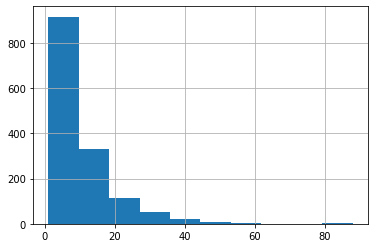

In [409]:
aux = df_comorbidade[df_comorbidade['Qtd dias UTI'] > 0]
print('Dias na UTI maior que zero:', aux.shape[0])
aux['Qtd dias UTI'].hist()

In [410]:
aux['Qtd dias UTI'].describe()

count    1445.000000
mean        9.963322
std         9.331649
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max        88.000000
Name: Qtd dias UTI, dtype: float64

Dias na UTI maior que zero: 864


<AxesSubplot:>

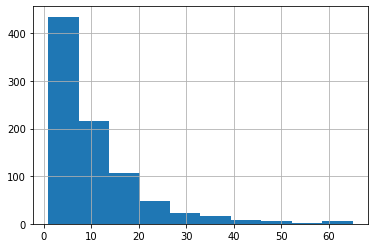

In [411]:
aux = df_saudavel[df_saudavel['Qtd dias UTI'] > 0]
print('Dias na UTI maior que zero:', aux.shape[0])
aux['Qtd dias UTI'].hist()

In [412]:
aux['Qtd dias UTI'].describe()

count    864.000000
mean      10.449074
std        9.898193
min        1.000000
25%        4.000000
50%        7.000000
75%       13.000000
max       65.000000
Name: Qtd dias UTI, dtype: float64

Análise sobre os pacientes de risco, 12,5% das pessoas

In [413]:
lista = []
for col in comorbidade:
    aux = df_comorbidade[df_comorbidade[col] == 'Sim']
    lista.append([col, len(aux)])

df = pd.DataFrame(lista, columns=['Coluna', 'Quantidade'])

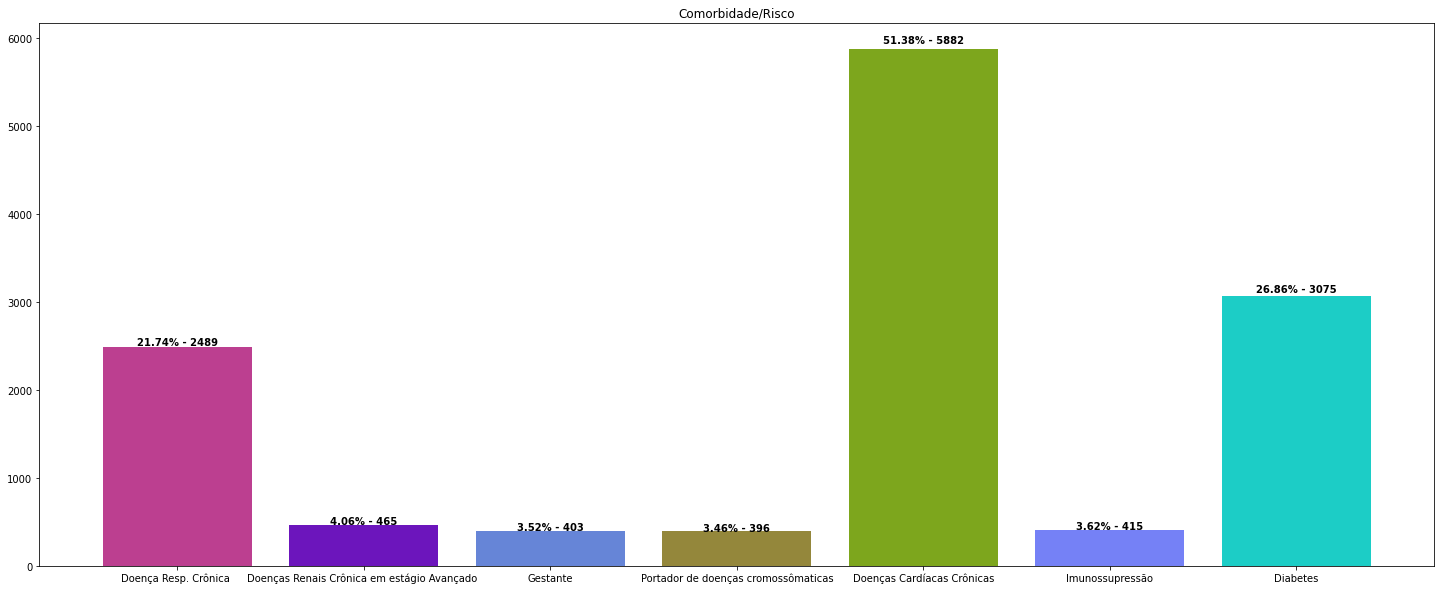

In [414]:
tamanho_do_dataframe = df_comorbidade.shape[0]
grafico_barra_com_porcentagem_2(df['Coluna'], df['Quantidade'],'Comorbidade/Risco',tamanho_do_dataframe ,figsize = (25,10))

#### Análise na evolução sobre as 3 comorbidades com maiores porcentagem: doenças cardíacas crônicas - 48,6%, diabetes - 26,9% e doenças respiratórias crônicas - 21,7%. 

In [415]:
evolucao = df_covid['Evolução'].unique()
evolucao

array(['Cura/Recuperado', 'Óbito por COVID-19', 'Internado - Enfermaria',
       'Internado - UTI ', 'Isolamento Domiciliar'], dtype=object)

In [416]:
df['Coluna'].unique()


array(['Doença Resp. Crônica ',
       'Doenças Renais Crônica em estágio Avançado ', 'Gestante',
       'Portador de doenças cromossômaticas',
       'Doenças Cardíacas Crônicas', 'Imunossupressão', 'Diabetes'],
      dtype=object)

In [417]:
lista = ['Doenças Cardíacas Crônicas', 'Diabetes', 'Doença Resp. Crônica ']

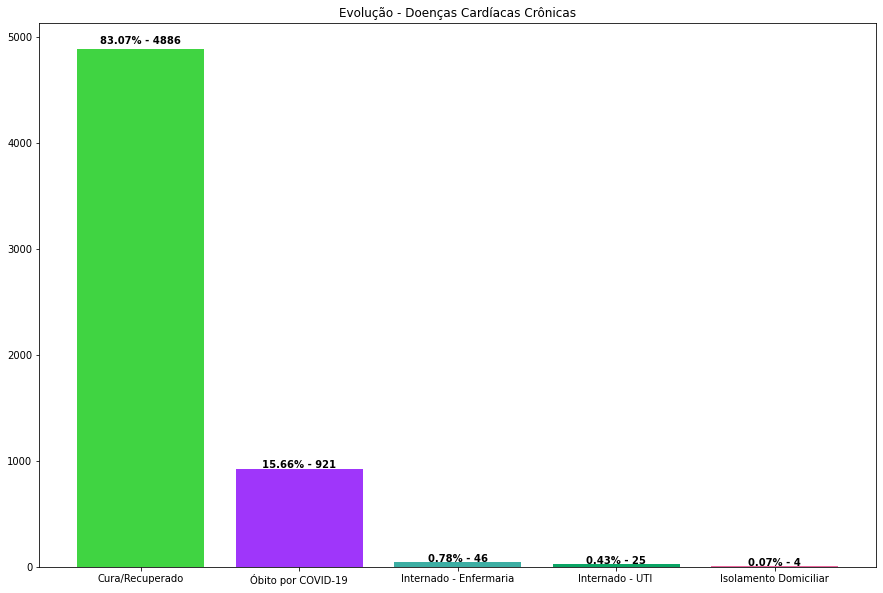

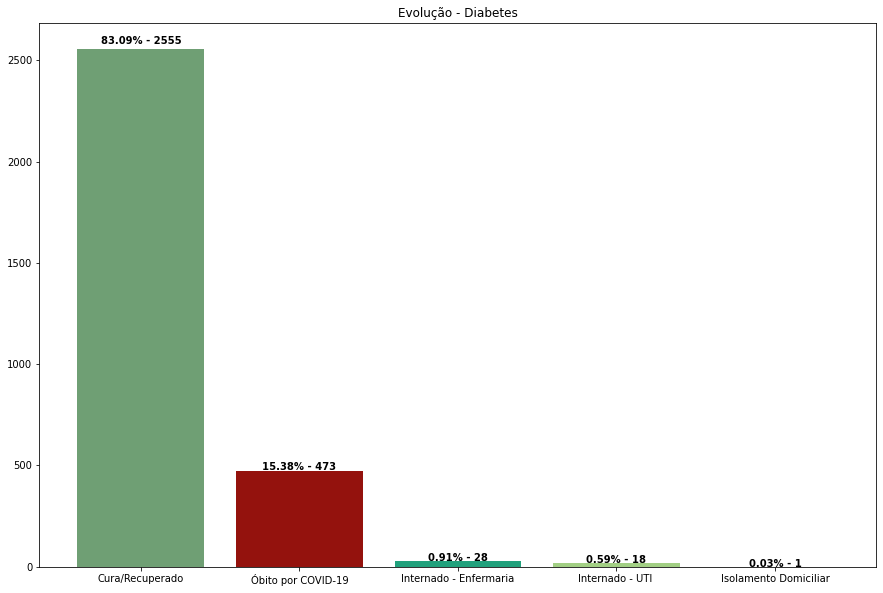

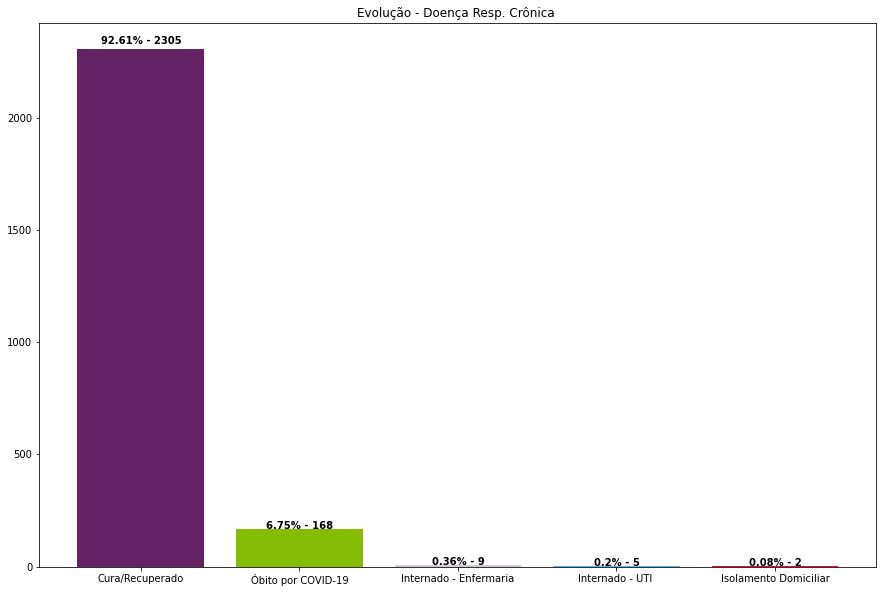

In [420]:
for j in lista:
    grafico_barra_com_porcentagem(df_comorbidade[df_comorbidade[j] == 'Sim'],'Evolução', f'Evolução - {j}', figsize = (15,10))
       